In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from skimage.feature import local_binary_pattern
import random
import seaborn as sns

## Get Modified Dataset for Training

In [20]:

# Loading feather files
if True:
    Combined_Feature_train_df = pd.read_feather('Garbage_data/Combined_Feature_train.feather')
    Combined_Feature_val_df = pd.read_feather('Garbage_data/Combined_Feature_val.feather')

In [21]:

# seperate training and validation dataframes between features and labels

X_train = Combined_Feature_train_df.iloc[:, :-1].values
X_val = Combined_Feature_val_df.iloc[:, :-1].values

y_train = Combined_Feature_train_df['label'].values
y_val = Combined_Feature_val_df['label'].values

## Pipeline

In [10]:
scaler = StandardScaler()

In [11]:
# SVM pipeline using one-vs-one organization to do multi-class classification
SVM_pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=50)),
                ('svc', svm.SVC(kernel='rbf', decision_function_shape='ovo', C=1.0))])

In [12]:
train_sizes, train_scores, val_scores = learning_curve(
    SVM_pipe,
    X_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 6),
    scoring="accuracy",
    n_jobs=-1
)

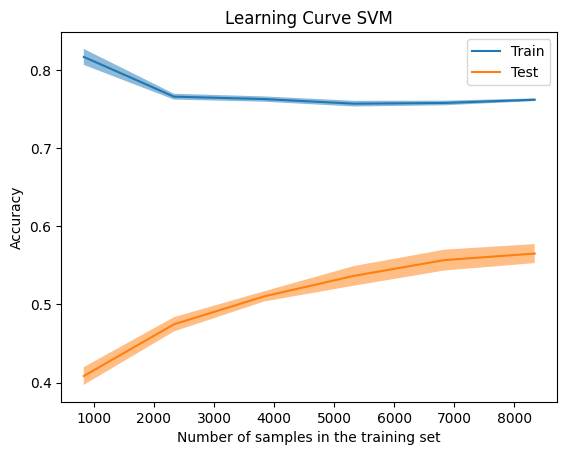

In [13]:
disp = LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores,
    test_scores=val_scores,
    score_name="Accuracy"
)

disp.plot()
plt.title("Learning Curve SVM")
plt.show()

In [14]:
val_scores

array([[0.3971223 , 0.40815348, 0.39808153, 0.42877698, 0.40959233],
       [0.47769784, 0.46618705, 0.4676259 , 0.4911271 , 0.4705036 ],
       [0.51798561, 0.5059952 , 0.51606715, 0.5117506 , 0.50023981],
       [0.54820144, 0.52709832, 0.53429257, 0.55395683, 0.52038369],
       [0.57026379, 0.5381295 , 0.56019185, 0.57122302, 0.54484412],
       [0.57841727, 0.55155875, 0.57170264, 0.57505995, 0.54964029]])

In [16]:
train_scores

array([[0.79856115, 0.82134293, 0.8177458 , 0.82973621, 0.81894484],
       [0.76359743, 0.77344754, 0.76488223, 0.76659529, 0.76316916],
       [0.76068822, 0.76955162, 0.76016684, 0.76173097, 0.76407716],
       [0.7594154 , 0.76353757, 0.75398164, 0.75416901, 0.75566798],
       [0.7556303 , 0.76133372, 0.7538754 , 0.75957882, 0.760895  ],
       [0.76270983, 0.76151079, 0.75959233, 0.76426859, 0.76390887]])